# **Reddit posts scraping and sentiment analysis**

In [ ]:
import pandas as pd

reddit_df = pd.read_csv('/content/drive/MyDrive/df_reddit.csv')

reddit_df

,Title,Content,Time,Sentiment
0,Good God how the hell do I fix this scaling th...,How can I fix this because it’s so fuckin anno...,2023-08-30 10:02:00,-1
1,MS Store for business?,"Hey there,\n\n&#x200B;\n\nanyone knows if the ...",2023-08-30 09:52:12,0
2,Is it just me? Endless Microsoft single-use co...,I must get about 5-10 “Your single-use code re...,2023-08-30 08:44:59,-1
3,Help with deleted files still showing in recen...,"So I had a bunch of files that I have deleted,...",2023-08-30 04:39:12,1
4,Separate themes,How to separate my outlook and word themes?\nI...,2023-08-30 03:49:33,-1
...,...,...,...,...
906,Mail and Calendar app is gone,"I use the app daily, couple days ago I saw the...",2023-07-04 12:04:12,-1
907,What is the best free music player (for local ...,"After Microsoft changed ""Groove Music"" into ""M...",2023-07-04 09:26:12,1
908,Movies an tv on discord,Is it possible to stream Movies an Tv on disco...,2023-07-04 07:41:17,1
909,They should use AI to figure out how to rename...,Everyone loves the convenience of calling a fi...,2023-07-04 07:39:22,-1


In [ ]:
reddit_df['Content'] = reddit_df['Content'].fillna('')


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
#function to categorize sentiment based on a compound score and a given threshold
def get_sentiment_category(compound_score, threshold=0.05):
    if compound_score >= threshold:
        return 1
    elif compound_score <= -threshold:
        return -1
    else:
        return 0

In [ ]:
def analyze_sentiment(Content):
    sentiment_scores = sid.polarity_scores(Content)
    compound_score = sentiment_scores['compound']
    return get_sentiment_category(compound_score)

# Apply the analyze_sentiment function to each description in the news DataFrame,
# and create a new 'Sentiment' column with the sentiment category
reddit_df['Sentiment'] = reddit_df['Content'].apply(analyze_sentiment)

In [ ]:
reddit_df


,Title,Content,Time,Sentiment
0,Good God how the hell do I fix this scaling th...,How can I fix this because it’s so fuckin anno...,2023-08-30 10:02:00,-1
1,MS Store for business?,"Hey there,\n\n&#x200B;\n\nanyone knows if the ...",2023-08-30 09:52:12,0
2,Is it just me? Endless Microsoft single-use co...,I must get about 5-10 “Your single-use code re...,2023-08-30 08:44:59,-1
3,Help with deleted files still showing in recen...,"So I had a bunch of files that I have deleted,...",2023-08-30 04:39:12,1
4,Separate themes,How to separate my outlook and word themes?\nI...,2023-08-30 03:49:33,-1
...,...,...,...,...
906,Mail and Calendar app is gone,"I use the app daily, couple days ago I saw the...",2023-07-04 12:04:12,-1
907,What is the best free music player (for local ...,"After Microsoft changed ""Groove Music"" into ""M...",2023-07-04 09:26:12,1
908,Movies an tv on discord,Is it possible to stream Movies an Tv on disco...,2023-07-04 07:41:17,1
909,They should use AI to figure out how to rename...,Everyone loves the convenience of calling a fi...,2023-07-04 07:39:22,-1


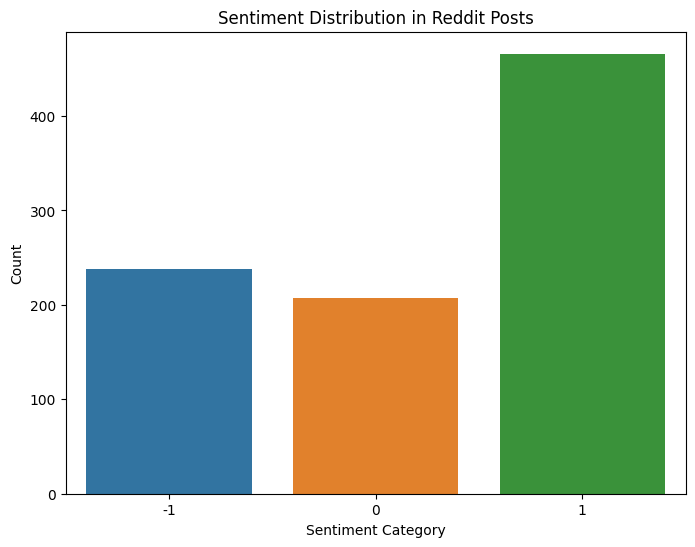

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=reddit_df)
plt.title('Sentiment Distribution in Reddit Posts')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

In [ ]:
reddit_df['Date'] = pd.to_datetime(reddit_df['Time']).dt.date


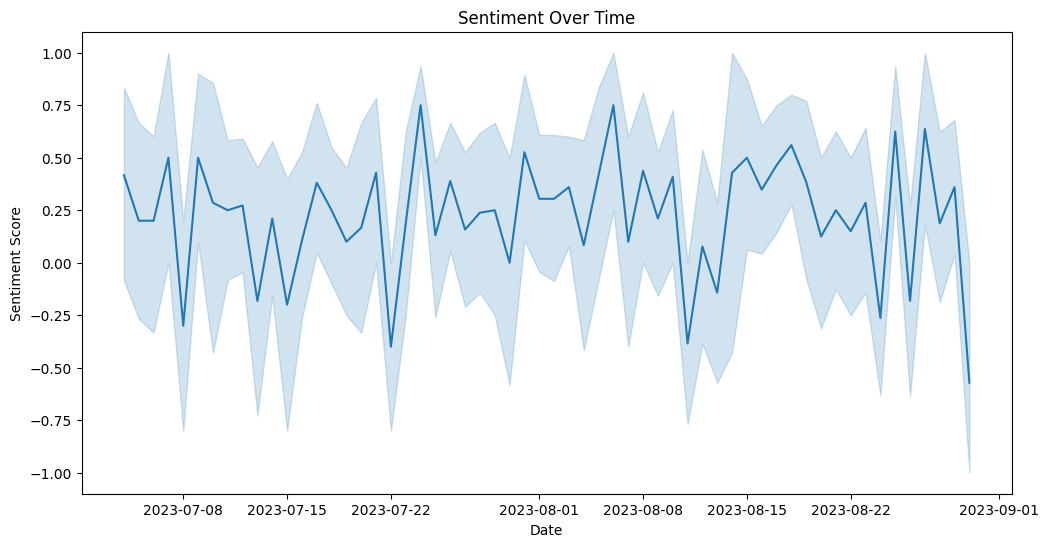

In [ ]:
# Sentiment Over Time
plt.figure(figsize=(12, 6))
reddit_df['Date'] = pd.to_datetime(reddit_df['Date'])
sns.lineplot(x='Date', y='Sentiment', data=reddit_df)
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.show()

(-0.5, 799.5, 399.5, -0.5)

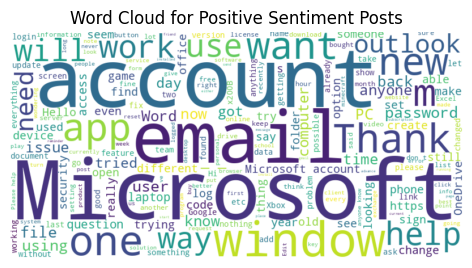

In [ ]:
from wordcloud import WordCloud


positive_posts = ' '.join(reddit_df[reddit_df['Sentiment'] == 1]['Content'])
neutral_posts = ' '.join(reddit_df[reddit_df['Sentiment'] == 0]['Content'])
negative_posts = ' '.join(reddit_df[reddit_df['Sentiment'] == -1]['Content'])

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_posts)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment Posts')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

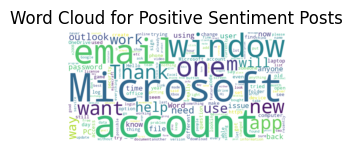

In [ ]:
plt.subplot(3, 1, 1)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_posts)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment Posts')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

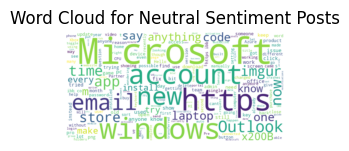

In [ ]:
plt.subplot(3, 1, 2)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_posts)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment Posts')
plt.axis('off')

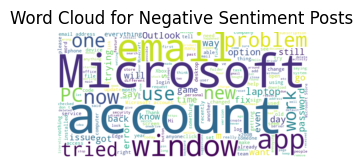

In [ ]:
plt.subplot(3, 1, 3)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_posts)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment Posts')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
reddit_df.to_csv('/content/drive/MyDrive/df_reddit_sentiment.csv', index=False)